# Estimating Average Effects

In [1]:
from matplotlib import pyplot as plt

from utils import read_and_transform_data, bootstrap_confidence_intervals
from SLearner import calculate_measures_s_learner
from TLearner import calculate_measures_t_learner
from InverseProbabilityWeighting import calculate_measures_IPW
from PropensityBasedStratification import calculate_measures_propensity_score_stratification
from DoublyRobust import calculate_measures_doubly_robust

plt.style.use('ggplot')

In [2]:
DATA_PATH = '/Users/gurkeinan/semester6/Causal-Inference/Project/code/data/processed_data.csv'
X, t, y = read_and_transform_data(DATA_PATH)
BOX_PLOTS_PATH  = '/Users/gurkeinan/semester6/Causal-Inference/Project/plots/box_plots.png'

## Covariate Adjustment

### S - Learner

In [3]:
S_Learner_ATE, S_Learner_ATT, S_Learner_ATC = calculate_measures_s_learner(X, t, y)
print(f'S-Learner ATE: {S_Learner_ATE}')
print(f'S-Learner ATT: {S_Learner_ATT}')
print(f'S-Learner ATC: {S_Learner_ATC}')

S-Learner ATE: -0.07721581548599671
S-Learner ATT: -0.07981387478849407
S-Learner ATC: -0.07535541195476575


In [4]:
S_Learner_ATE_CI, S_Learner_ATT_CI, S_Learner_ATC_CI, bootstrap_S_Learner_ATE, bootstrap_S_Learner_ATT, bootstrap_S_Learner_ATC = bootstrap_confidence_intervals(X, t, y, calculate_measures_s_learner)
print(f'S-Learner ATE 95% CI: {S_Learner_ATE_CI}')
print(f'S-Learner ATT 95% CI: {S_Learner_ATT_CI}')
print(f'S-Learner ATC 95% CI: {S_Learner_ATC_CI}')

S-Learner ATE 95% CI: [-0.09858661 -0.05830142]
S-Learner ATT 95% CI: [-0.10011478 -0.05998789]
S-Learner ATC 95% CI: [-0.10084281 -0.05197293]


### T - Learner

In [5]:
T_Learner_ATE, T_Learner_ATT, T_Learner_ATC = calculate_measures_t_learner(X, t, y)
print(f'T-Learner ATE: {T_Learner_ATE}')
print(f'T-Learner ATT: {T_Learner_ATT}')
print(f'T-Learner ATC: {T_Learner_ATC}')

T-Learner ATE: -0.13544128030124736
T-Learner ATT: -0.153034404963339
T-Learner ATC: -0.122843295638126


In [6]:
T_Learner_ATE_CI, T_Learner_ATT_CI, T_Learner_ATC_CI, bootstrap_T_Learner_ATE, bootstrap_T_Learner_ATT, bootstrap_T_Learner_ATC = bootstrap_confidence_intervals(X, t, y, calculate_measures_t_learner)
print(f'T-Learner ATE 95% CI: {T_Learner_ATE_CI}')
print(f'T-Learner ATT 95% CI: {T_Learner_ATT_CI}')
print(f'T-Learner ATC 95% CI: {T_Learner_ATC_CI}')

T-Learner ATE 95% CI: [-0.17132978 -0.11313974]
T-Learner ATT 95% CI: [-0.19318971 -0.12652686]
T-Learner ATC 95% CI: [-0.16237473 -0.09344111]


## Propensity Score Based Methods

### Inverse Probability Weighting

In [7]:
IPW_ATE, IPW_ATT, IPW_ATC = calculate_measures_IPW(X, t, y)
print(f'IPW ATE: {IPW_ATE}')
print(f'IPW ATT: {IPW_ATT}')
print(f'IPW ATC: {IPW_ATC}')

IPW ATE: -0.2022977690410979
IPW ATT: -0.1643989339130586
IPW ATC: -0.1759951730379336


In [8]:
IPW_ATE_CI, IPW_ATT_CI, IPW_ATC_CI, bootstrap_IPW_ATE, bootstrap_IPW_ATT, bootstrap_IPW_ATC = bootstrap_confidence_intervals(X, t, y, calculate_measures_IPW)
print(f'IPW ATE 95% CI: {IPW_ATE_CI}')
print(f'IPW ATT 95% CI: {IPW_ATT_CI}')
print(f'IPW ATC 95% CI: {IPW_ATC_CI}')

IPW ATE 95% CI: [-0.22197787 -0.18232624]
IPW ATT 95% CI: [-0.20114022 -0.1363002 ]
IPW ATC 95% CI: [-0.21610927 -0.13768276]



### Propensity Score Stratification

In [9]:
Propensity_Score_Stratification_ATE, Propensity_Score_Stratification_ATT, Propensity_Score_Stratification_ATC = calculate_measures_propensity_score_stratification(X, t, y)
print(f'Propensity Score Stratification ATE: {Propensity_Score_Stratification_ATE}')
print(f'Propensity Score Stratification ATT: {Propensity_Score_Stratification_ATT}')
print(f'Propensity Score Stratification ATC: {Propensity_Score_Stratification_ATC}')

Propensity Score Stratification ATE: 0.01479755462227326
Propensity Score Stratification ATT: 0.003709639335826299
Propensity Score Stratification ATC: 0.02273732594814986


In [10]:
Propensity_Score_Stratification_ATE_CI, Propensity_Score_Stratification_ATT_CI, Propensity_Score_Stratification_ATC_CI, bootstrap_Propensity_Score_Stratification_ATE, bootstrap_Propensity_Score_Stratification_ATT, bootstrap_Propensity_Score_Stratification_ATC = bootstrap_confidence_intervals(X, t, y, calculate_measures_propensity_score_stratification)
print(f'Propensity Score Stratification ATE 95% CI: {Propensity_Score_Stratification_ATE_CI}')
print(f'Propensity Score Stratification ATT 95% CI: {Propensity_Score_Stratification_ATT_CI}')
print(f'Propensity Score Stratification ATC 95% CI: {Propensity_Score_Stratification_ATC_CI}')

Propensity Score Stratification ATE 95% CI: [-0.02939355  0.01816268]
Propensity Score Stratification ATT 95% CI: [-0.00972852  0.00271425]
Propensity Score Stratification ATC 95% CI: [-0.04386905  0.02818409]



## Doubly Robust

In [11]:
Doubly_Robust_ATE, Doubly_Robust_ATT, Doubly_Robust_ATC = calculate_measures_doubly_robust(X, t, y)
print(f'Doubly Robust ATE: {Doubly_Robust_ATE}')
print(f'Doubly Robust ATT: {Doubly_Robust_ATT}')
print(f'Doubly Robust ATC: {Doubly_Robust_ATC}')

Doubly Robust ATE: -0.15344787008707939
Doubly Robust ATT: -0.08901100022902272
Doubly Robust ATC: -0.15751211631663975


In [12]:
Doubly_Robust_ATE_CI, Doubly_Robust_ATT_CI, Doubly_Robust_ATC_CI, bootstrap_Doubly_Robust_ATE, bootstrap_Doubly_Robust_ATT, bootstrap_Doubly_Robust_ATC = bootstrap_confidence_intervals(X, t, y, calculate_measures_doubly_robust)
print(f'Doubly Robust ATE 95% CI: {Doubly_Robust_ATE_CI}')
print(f'Doubly Robust ATT 95% CI: {Doubly_Robust_ATT_CI}')
print(f'Doubly Robust ATC 95% CI: {Doubly_Robust_ATC_CI}')

Doubly Robust ATE 95% CI: [-0.22052836 -0.11273241]
Doubly Robust ATT 95% CI: [-0.21173431 -0.06191251]
Doubly Robust ATC 95% CI: [-0.23064857 -0.09885585]


# Boxplot of ATE, ATT, and ATC estimates

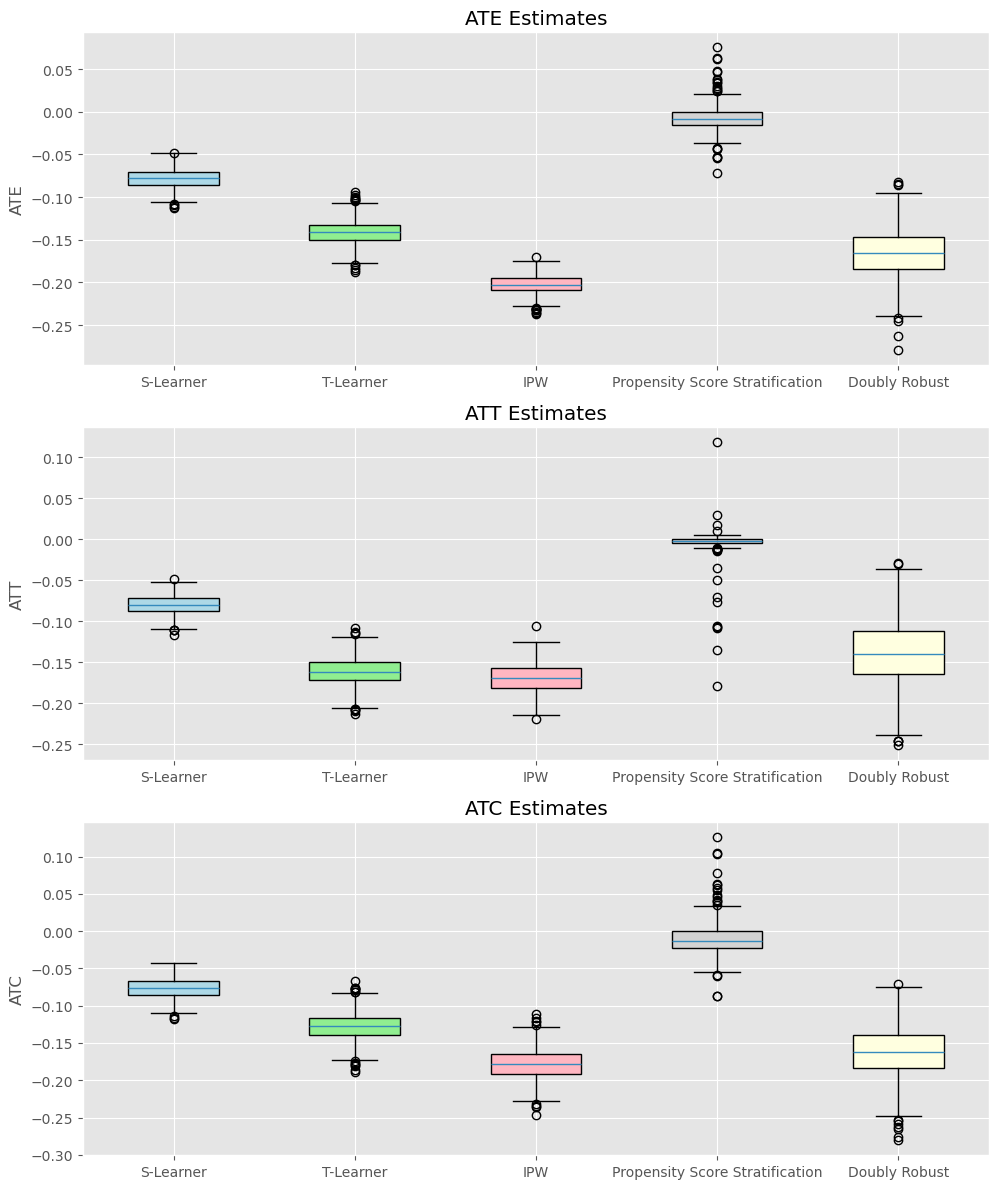

In [13]:
# Plot the ATE, ATT, and ATC estimates for each method
ATE_values = [bootstrap_S_Learner_ATE, bootstrap_T_Learner_ATE, bootstrap_IPW_ATE, bootstrap_Propensity_Score_Stratification_ATE, bootstrap_Doubly_Robust_ATE]
ATT_values = [bootstrap_S_Learner_ATT, bootstrap_T_Learner_ATT, bootstrap_IPW_ATT, bootstrap_Propensity_Score_Stratification_ATT, bootstrap_Doubly_Robust_ATT]
ATC_values = [bootstrap_S_Learner_ATC, bootstrap_T_Learner_ATC, bootstrap_IPW_ATC, bootstrap_Propensity_Score_Stratification_ATC, bootstrap_Doubly_Robust_ATC]

ATE_CIs = [S_Learner_ATE_CI, T_Learner_ATE_CI, IPW_ATE_CI, Propensity_Score_Stratification_ATE_CI, Doubly_Robust_ATE_CI]
ATT_CIs = [S_Learner_ATT_CI, T_Learner_ATT_CI, IPW_ATT_CI, Propensity_Score_Stratification_ATT_CI, Doubly_Robust_ATT_CI]
ATC_CIs = [S_Learner_ATC_CI, T_Learner_ATC_CI, IPW_ATC_CI, Propensity_Score_Stratification_ATC_CI, Doubly_Robust_ATC_CI]

colors = ['lightblue', 'lightgreen', 'lightpink', 'lightgrey', 'lightyellow']
method_names = ['S-Learner', 'T-Learner', 'IPW', 'Propensity Score Stratification', 'Doubly Robust']

plt.figure(figsize=(10, 12))
plt.subplot(3, 1, 1)  
boxes_ate = plt.boxplot(ATE_values, patch_artist=True, labels=list(method_names))
for patch, color in zip(boxes_ate['boxes'], colors):
    patch.set_facecolor(color)
plt.title('ATE Estimates')
plt.ylabel('ATE')

plt.subplot(3, 1, 2) 
boxes_att = plt.boxplot(ATT_values, patch_artist=True, labels=list(method_names))
for patch, color in zip(boxes_att['boxes'], colors):
    patch.set_facecolor(color)
plt.title('ATT Estimates')
plt.ylabel('ATT')

plt.subplot(3, 1, 3) 
boxes_atc = plt.boxplot(ATC_values, patch_artist=True, labels=list(method_names))
for patch, color in zip(boxes_atc['boxes'], colors):
    patch.set_facecolor(color)
plt.title('ATC Estimates')
plt.ylabel('ATC')

plt.subplots_adjust(hspace=0.8)
plt.tight_layout()

# Save the box plots
plt.savefig(BOX_PLOTS_PATH)

plt.show()